# Julia sets

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pathlib import Path
import psutil
import sh
import time

Compile and build the application.

In [2]:
application = 'julia.exe'

In [3]:
_ = sh.gfortran('-O2', '-fopenmp', '-o', application, 'julia_omp.f90', '-lm')

Since the current working directory is not in the `PATH` environment variable, and the executable has a `.` in its name, a command has to be created.

In [4]:
julia = sh.Command(Path.cwd() / application)

Execute the application in the background and monitor user and system time and memory (RSS, Resident Set Size).

In [5]:
computation = julia('2000', _bg=True)

In [6]:
process = psutil.Process(pid=computation.pid)
while psutil.pid_exists(process.pid):
    times = process.cpu_times()
    memory = process.memory_info()
    print(f'user: {times.user}, sys: {times.system}, CPU: {process.cpu_percent()} %, rss: {memory.rss} bytes')
    time.sleep(0.5)

user: 0.0, sys: 0.0, CPU: 0.0 %, rss: 12972032 bytes
user: 0.34, sys: 0.04, CPU: 75.1 %, rss: 82718720 bytes
user: 0.75, sys: 0.04, CPU: 81.7 %, rss: 82718720 bytes
user: 1.16, sys: 0.05, CPU: 83.8 %, rss: 82718720 bytes
user: 1.53, sys: 0.05, CPU: 73.8 %, rss: 82718720 bytes
user: 1.9, sys: 0.05, CPU: 73.8 %, rss: 82718720 bytes
user: 2.25, sys: 0.05, CPU: 69.8 %, rss: 82718720 bytes
user: 2.57, sys: 0.06, CPU: 65.8 %, rss: 82718720 bytes
user: 2.95, sys: 0.08, CPU: 79.8 %, rss: 82718720 bytes
user: 3.26, sys: 0.08, CPU: 61.7 %, rss: 0 bytes


Just for fun, plot the output.

In [7]:
data_file = 'julia.txt'

In [8]:
data = np.genfromtxt(data_file)

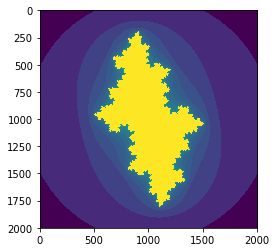

In [9]:
_ = plt.imshow(data)

Cleaning up the artifacts created in this notebook.

In [10]:
for file in map(Path, [data_file, application]):
    file.unlink()